In [20]:
import numpy as np
import scipy as sp
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

%matplotlib notebook

In [16]:
#mouse ID:
mouseID = '599657'

#find the path for the probe channel info
channels_path=os.path.join(r'\\allen\programs\mindscope\workgroups\np-behavior\tissuecyte',mouseID)

#find the paths for experiments
exp_paths=glob.glob(os.path.join(r'\\allen\programs\mindscope\workgroups\np-exp','*'+mouseID+'*'))
exp_paths.sort()

#keep only the paths with ephys data
ephys_paths=[]
for path in exp_paths:
    if len(glob.glob(os.path.join(path, '*probe*_sorted')))>0:
        ephys_paths.append(path)


In [244]:
channels_path

'\\\\allen\\programs\\mindscope\\workgroups\\np-behavior\\tissuecyte\\599657'

In [18]:
ephys_paths

['\\\\allen\\programs\\mindscope\\workgroups\\np-exp\\1167400342_599657_20220329',
 '\\\\allen\\programs\\mindscope\\workgroups\\np-exp\\1167606413_599657_20220330',
 '\\\\allen\\programs\\mindscope\\workgroups\\np-exp\\1167850751_599657_20220331']

In [219]:
probe = 'B'
day = 1

channel_info = pd.read_csv(glob.glob(os.path.join(channels_path,'*'+probe+str(day)+'_channels*'))[0])

probe_ephys_path=glob.glob(os.path.join(ephys_paths[day],'*probe'+probe+'_sorted*',
                                        'continuous','Neuropix-PXI-100.0'))[0]

spike_times = np.load(os.path.join(probe_ephys_path,'spike_times.npy'))
spike_times=spike_times/30000
spike_clusters = np.load(os.path.join(probe_ephys_path,'spike_clusters.npy'))
unit_metrics = pd.read_csv(os.path.join(probe_ephys_path,'metrics.csv'))

In [220]:
channel_info

,AP,DV,ML,probe_name,channel,channel_areas
0,329,0,207,Probe B1,383,NaN
1,330,0,207,Probe B1,382,NaN
2,329,1,207,Probe B1,381,NaN
3,330,1,208,Probe B1,380,NaN
4,329,2,206,Probe B1,379,NaN
...,...,...,...,...,...,...
379,322,137,202,Probe B1,4,NPC
380,322,138,202,Probe B1,3,NPC
381,322,138,201,Probe B1,2,NPC
382,322,139,202,Probe B1,1,NPC


In [221]:
unit_metrics

,Unnamed: 0,cluster_id,firing_rate,presence_ratio,isi_viol,amplitude_cutoff,isolation_distance,l_ratio,d_prime,nn_hit_rate,...,duration,halfwidth,PT_ratio,repolarization_slope,recovery_slope,amplitude,spread,velocity_above,velocity_below,quality
0,0,0,4.416295,0.99,0.010238,0.002264,97.118782,0.000001,8.176374,0.994000,...,0.357119,0.206030,0.577942,0.960221,-0.156156,155.561250,30.0,0.343384,NaN,good
1,1,1,2.153814,0.99,1.721577,0.020641,26.632911,0.047225,3.701394,0.760000,...,0.343384,0.164824,0.549512,1.554951,-0.330696,349.981125,40.0,0.686767,NaN,good
2,2,2,0.017223,0.50,0.000000,0.500000,18.344862,0.003416,3.651687,0.000000,...,0.467002,0.233501,0.514371,0.711849,-0.099577,153.344381,80.0,-0.016352,NaN,noise
3,3,3,5.669343,0.99,0.204989,0.117282,106.934270,0.000017,5.705586,0.996667,...,0.357119,0.164824,0.611421,1.005463,-0.259778,256.981725,30.0,0.000000,NaN,good
4,4,4,2.357831,0.99,0.095769,0.000020,58.860619,0.004909,4.871752,0.934667,...,0.398325,0.137353,0.383422,1.581870,-0.272925,396.946680,40.0,0.343384,0.000000,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,447,453,6.215520,0.99,0.008613,0.002973,75.380101,0.002342,5.078673,0.964000,...,0.343384,0.137353,0.513241,1.082784,-0.206506,266.025825,80.0,0.206030,-0.274707,good
448,448,454,0.055221,0.84,0.000000,0.431979,30.420902,0.004373,4.598642,0.000000,...,0.302178,0.164824,0.299336,1.424947,-0.127143,330.120579,50.0,-0.343384,0.000000,good
449,449,455,0.113639,0.89,0.000000,0.064642,40.387517,0.001491,6.063135,0.500000,...,0.357119,0.164824,0.211007,0.351689,-0.030317,257.606578,60.0,-0.372816,NaN,noise
450,450,456,0.145245,0.97,0.000000,0.500000,19.695303,0.030750,2.828614,0.095238,...,0.604355,0.288442,0.669464,0.920505,-0.185945,361.295666,70.0,0.686767,0.686767,good


In [222]:
# good_units = unit_metrics.query('quality == "good" and \
#                                 isi_viol < 0.5 and \
#                                 amplitude_cutoff < 0.1 and \
#                                 presence_ratio > 0.95')
good_units = unit_metrics.query('quality == "good"')

In [223]:
good_units

,Unnamed: 0,cluster_id,firing_rate,presence_ratio,isi_viol,amplitude_cutoff,isolation_distance,l_ratio,d_prime,nn_hit_rate,...,duration,halfwidth,PT_ratio,repolarization_slope,recovery_slope,amplitude,spread,velocity_above,velocity_below,quality
0,0,0,4.416295,0.99,0.010238,0.002264,97.118782,0.000001,8.176374,0.994000,...,0.357119,0.206030,0.577942,0.960221,-0.156156,155.561250,30.0,0.343384,NaN,good
1,1,1,2.153814,0.99,1.721577,0.020641,26.632911,0.047225,3.701394,0.760000,...,0.343384,0.164824,0.549512,1.554951,-0.330696,349.981125,40.0,0.686767,NaN,good
3,3,3,5.669343,0.99,0.204989,0.117282,106.934270,0.000017,5.705586,0.996667,...,0.357119,0.164824,0.611421,1.005463,-0.259778,256.981725,30.0,0.000000,NaN,good
4,4,4,2.357831,0.99,0.095769,0.000020,58.860619,0.004909,4.871752,0.934667,...,0.398325,0.137353,0.383422,1.581870,-0.272925,396.946680,40.0,0.343384,0.000000,good
5,5,5,1.818756,0.99,0.402386,0.006802,48.085167,0.006650,4.122307,0.915410,...,0.384590,0.123618,0.413202,1.260995,-0.231262,358.032480,40.0,0.343384,-0.686767,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,446,452,0.710599,0.83,0.000000,0.001907,78.622141,0.000532,5.531939,0.966825,...,0.645561,0.137353,0.329498,0.806741,-0.098457,230.636640,60.0,0.824121,-0.343384,good
447,447,453,6.215520,0.99,0.008613,0.002973,75.380101,0.002342,5.078673,0.964000,...,0.343384,0.137353,0.513241,1.082784,-0.206506,266.025825,80.0,0.206030,-0.274707,good
448,448,454,0.055221,0.84,0.000000,0.431979,30.420902,0.004373,4.598642,0.000000,...,0.302178,0.164824,0.299336,1.424947,-0.127143,330.120579,50.0,-0.343384,0.000000,good
450,450,456,0.145245,0.97,0.000000,0.500000,19.695303,0.030750,2.828614,0.095238,...,0.604355,0.288442,0.669464,0.920505,-0.185945,361.295666,70.0,0.686767,0.686767,good


In [224]:
spike_times

array([[3.20000000e-03],
       [3.76666667e-03],
       [4.96666667e-03],
       ...,
       [5.63187270e+03],
       [5.63187303e+03],
       [5.63187320e+03]])

In [225]:
spike_clusters

array([[190],
       [154],
       [356],
       ...,
       [318],
       [191],
       [182]], dtype=uint32)

In [226]:
#find area borders defined by annotation

area_borders=np.zeros((384))

for cc in range(1,len(channel_info)):
    if (type(channel_info['channel_areas'].iloc[cc])==float)|(type(channel_info['channel_areas'].iloc[cc-1])==float):
        continue
        
    if (channel_info['channel_areas'].iloc[cc]!=channel_info['channel_areas'].iloc[cc-1]):
        area_borders[channel_info['channel'].iloc[cc]]=1
#         area_borders[cc]=1
    


In [227]:
type(channel_info['channel_areas'].iloc[0])

float

In [228]:
area_borders

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [229]:
channel_info['channel_areas'].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'RSPd1', nan, nan, nan, 'RSPd1', 'RSPd1',
       'RSPd1', 'RSPd1', 'RSPd1', 'RSPd1', 'RSPd1', 'RSPd1', 'RSPd1',
       'RSPd1', 'RSPd1', 'RSPd1', 'RSPd1', 'RSPd1', 'RSPd1', 'RSPd1',
       'RSPd1', 'RSPd1', 'RSPd1', 'RSPd1', 'RSPd1', 'RSPd1', 'RSPd1',
       'RSPd1', 'RSPd2/3', 'RSPd2/3', 'RSPd1', 'RSPd2/3', 'RSPd2/3',
       'RSPd2/3', 'RSPd2/3', 'RSPd2/3', 'RSPd2/3', 'RSPd2/3', 'RSPd2/3',
       'RSPd2/3', 'RSPd2/3', 'RSPd2/3', 'RSPd2/3', 'RSPd2/3', 'RSPd2/3',
       'RSPd2/3', 'RSPd2/3', 'RSPd2/3', 'RSPd2/3', 'RSPd2/3', 'RSPd2/3',
       'RSPd2/3', 'RSPd5', 'RSPd2/3', 'RSPd5', 'RSPd2/3', 'RSPd5',
       'RSPd5', 'RSPd2/3', 'RSPd5', 'RSPd5', 'RSPd5', 'RSPd5', 'RSPd5',
       'RSPd5', 'RSPd5', 'RSPd5', 'RSPv5', 'RSPv5', 'RSPd5', 'RSPd5',
       'RSPd5', 'RSPd5', 'RSPv5', 'RSPd5', 'RSPd5', 'RSPv5', 'RSPd5',
       'RSPv5', 'RSPv5', 'RSPv5', 'RSPv5', 'RSPd5', 'RSPv5', 'RSPv5',
       

In [230]:
border_inds=np.where(area_borders)[0]
border_inds

array([  0,  32,  33,  34,  66,  70,  71,  74,  75,  94,  95,  96,  97,
        99, 100, 102, 103, 131, 133, 135, 138, 140, 141, 278, 280, 282,
       283, 287, 288, 289, 291, 292, 296, 298, 306, 307, 309, 310, 311,
       312, 313, 334, 335, 337], dtype=int64)

In [231]:
min_size=0
borders=border_inds[np.where(np.diff(border_inds)>min_size)[0]]
borders

array([  0,  32,  33,  34,  66,  70,  71,  74,  75,  94,  95,  96,  97,
        99, 100, 102, 103, 131, 133, 135, 138, 140, 141, 278, 280, 282,
       283, 287, 288, 289, 291, 292, 296, 298, 306, 307, 309, 310, 311,
       312, 313, 334, 335], dtype=int64)

In [207]:
# np.diff(border_inds)


In [232]:
#bin spikes 
binsize = .1 #seconds
tbins = np.arange(0,np.max(spike_times),binsize)

channel_binsize = 4
cbins = np.arange(0,384,channel_binsize)

channel_spike_mat = np.zeros((len(cbins),len(tbins)-1))
channel_spike_mat[:] = np.nan

for ic,cc in enumerate(cbins):
    
    units_on_channel = good_units.query('peak_channel >= @cc and \
                                         peak_channel < @cc+4')['cluster_id'].values
    
    if len(units_on_channel)>0:
        if len(units_on_channel)>1:
            channel_spikes = spike_times[np.any(spike_clusters==units_on_channel,axis=1)]
        else:
            channel_spikes = spike_times[spike_clusters==units_on_channel]

        channel_hist,edges = np.histogram(channel_spikes,bins=tbins)

        channel_spike_mat[ic,:] = channel_hist

# for cc in range(0,384):
    
#     units_on_channel = good_units.query('peak_channel == @cc')['cluster_id'].values
    
#     if len(units_on_channel)>0:
#         if len(units_on_channel)>1:
#             channel_spikes = spike_times[np.any(spike_clusters==units_on_channel,axis=1)]
#         else:
#             channel_spikes = spike_times[spike_clusters==units_on_channel]

#         channel_hist,edges = np.histogram(channel_spikes,bins=tbins)

#         channel_spike_mat[cc,:] = channel_hist

<IPython.core.display.Javascript object>


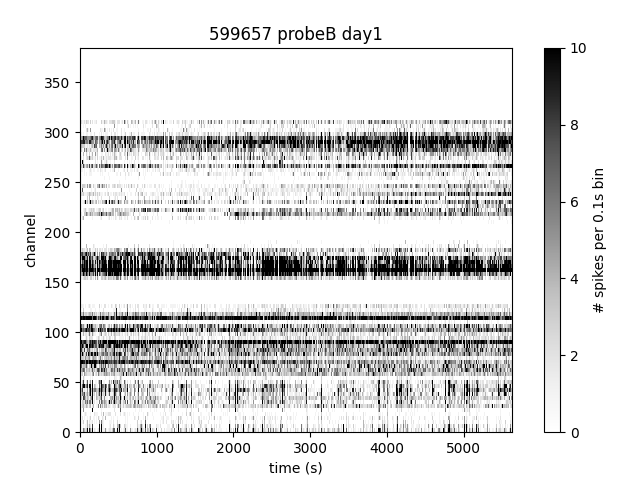

Text(0, 0.5, '# spikes per 0.1s bin')

In [241]:
fig,ax = plt.subplots(1,1)
im=ax.imshow(channel_spike_mat,aspect='auto',interpolation='none',vmin=0,vmax=10,cmap=plt.get_cmap('Greys'),
             extent=(0,np.max(spike_times),384,0))
ax.invert_yaxis()

ax.set_ylabel('channel')
ax.set_xlabel('time (s)')
ax.set_title(mouseID+' probe'+probe+' day'+str(day))

# ax.hlines(borders,xmin=0,xmax=np.max(spike_times))

# this adjusts the other plots to make space for the colorbar
fig.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=0.3) 
cax = plt.axes([0.85, 0.1, 0.025, 0.8])
cbar = fig.colorbar(im, cax=cax)
cbar.ax.set_ylabel('# spikes per '+str(binsize)+'s bin')

In [234]:
corr = np.corrcoef(channel_spike_mat)

<IPython.core.display.Javascript object>


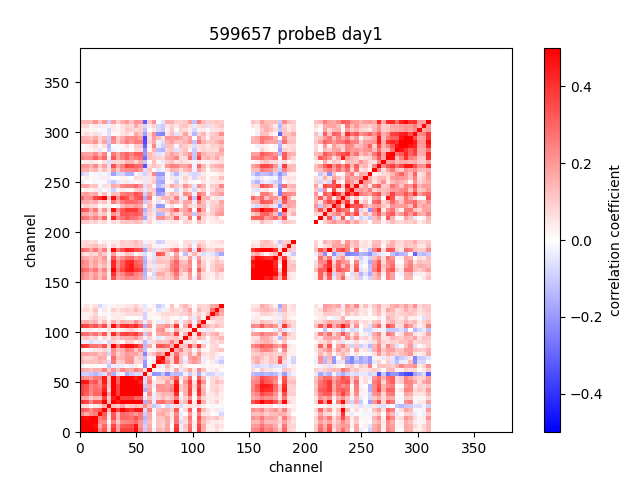

Text(0, 0.5, 'correlation coefficient')

In [243]:
fig,ax = plt.subplots(1,1)
im=ax.imshow(corr,aspect='auto',interpolation='none',vmin=-0.5,vmax=0.5,cmap=plt.get_cmap('bwr'),
             extent=(0,384,384,0))
ax.invert_yaxis()

# ax.hlines(borders,xmin=0,xmax=384)
ax.set_title(mouseID+' probe'+probe+' day'+str(day))
ax.set_ylabel('channel')
ax.set_xlabel('channel')

# this adjusts the other plots to make space for the colorbar
fig.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=0.3) 
cax = plt.axes([0.85, 0.1, 0.025, 0.8])
cbar = fig.colorbar(im, cax=cax)
cbar.ax.set_ylabel('correlation coefficient')

In [ ]:
# make into a vector


